Importar librerias

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import seaborn as sns
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

Cargar los datos y normalizarlos

In [29]:
r=r'winequality-red.csv'
Datos=pd.read_csv(r,sep=";")
nombres=Datos.columns

In [3]:
X=Datos.drop("quality",axis=1).values
y=Datos["quality"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=127)

In [4]:
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

Entrenar el modelo de aprendizaje e identificación de variables

In [26]:
lda= LinearDiscriminantAnalysis(solver="eigen")
X_r2=lda.fit(X_train_scaled,y_train).transform(X_train_scaled)

In [27]:
# Variables más importantes en la clasificación
print("Factores de ponderación")
print(pd.DataFrame(lda.coef_,columns=nombres[:-1],index=[3,4,5,6,7,8]))

Factores de ponderación
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3       0.187925          0.965470     0.332786        0.041144   0.467235   
4       0.196834          0.628062     0.252120        0.155671   0.163834   
5      -0.125813          0.193745     0.045487       -0.043712   0.132448   
6       0.016013         -0.131182    -0.064411       -0.014979  -0.053542   
7       0.286587         -0.398091    -0.032710        0.136425  -0.299001   
8       0.253956         -0.485994     0.044395        0.177661  -0.447427   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
3            -0.042160             -0.041843 -0.042524  0.523448  -0.444609   
4            -0.183015              0.098197 -0.247455  0.404267  -0.147216   
5            -0.114653              0.282209  0.113997  0.052140  -0.275111   
6             0.078641             -0.153413  0.014412 -0.042383   0.118167   
7             0.155490            

Clasificación de las nuevas observaciones

In [28]:
predict=lda.predict(X_test_scaled)

print(confusion_matrix(predict,y_test))
print(classification_report(y_test,predict))

[[  1   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   8 112  43   3   0]
 [  0   4  31  69  22   2]
 [  0   0   0  10  14   1]
 [  0   0   0   0   0   0]]
             precision    recall  f1-score   support

          3       1.00      1.00      1.00         1
          4       0.00      0.00      0.00        12
          5       0.67      0.78      0.72       143
          6       0.54      0.57      0.55       122
          7       0.56      0.36      0.44        39
          8       0.00      0.00      0.00         3

avg / total       0.58      0.61      0.59       320



C:\Users\EEIE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ilustración de resultados

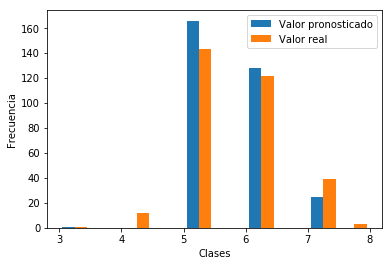

In [9]:
current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
colors = np.random.randint(0,5,120)

plt.hist([predict,y_test],label=["Valor pronosticado","Valor real"])
plt.legend(loc=0)
plt.ylabel("Frecuencia")
plt.xlabel("Clases")
plt.savefig("Error_lda")
plt.show()
